In [2]:
import pandas as pd

In [65]:
df= pd.read_csv("titanic-passengers.csv",sep=";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [66]:
df['Survived']=df['Survived'].map({'No':0,'Yes':1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


### 1. Apply logistic regression. 

In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,NaN,0.0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,0.0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,NaN,0.0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,NaN,0.0
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,1.0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,NaN,1.0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,NaN,0.0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,NaN,0.0


In [74]:
print(df["Embarked"].value_counts())

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64


In [96]:
print(df["Pclass"].value_counts())
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Embarked"].fillna(1,inplace=True)

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [109]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=df[["Pclass", "Sex", "Age","Fare","Embarked"]]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) #splitting data with test size of 20%

logreg = LogisticRegression(solver='lbfgs')   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.76


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

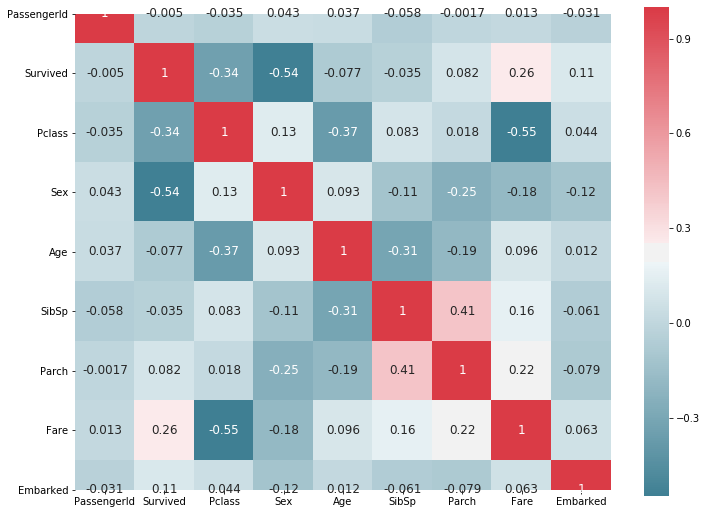

In [88]:
plot_correlation_map( df )

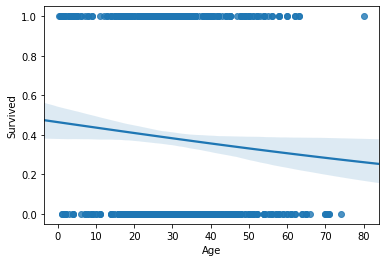

In [102]:
sns.regplot(x='Age',y='Survived',data=df,logistic=True)

### Use confusion matrix to validate your model. 

In [106]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=['Predicted'])
print(confusion_matrix)

Predicted   0   1
Actual           
0          86  22
1          22  49


Not survived: ROC AUC=0.500
Survived: ROC AUC=0.835


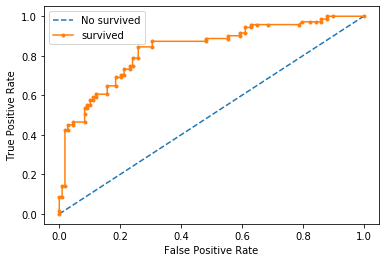

In [128]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a not survived  prediction (majority class)
ns_probs = [0 for _ in range(len(x_test))]
# predict probabilities
lr_probs = logreg.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Not survived: ROC AUC=%.3f' % (ns_auc))
print('Survived: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No survived')
plt.plot(lr_fpr, lr_tpr, marker='.', label='survived')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


 A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.
